# Scipy

## Constants

https://docs.scipy.org/doc/scipy/reference/constants.html#length

## Special functions

https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special

In [2]:
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

%matplotlib inline

## Airy

In [5]:
x = np.linspace(-15, 5, 201)
ai, aip, bi, bip = special.airy(x)

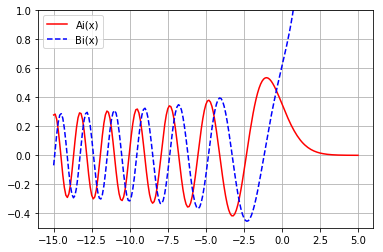

In [6]:
plt.plot(x, ai, 'r', label='Ai(x)')
plt.plot(x, bi, 'b--', label='Bi(x)')
plt.ylim(-0.5, 1.0)
plt.grid()
plt.legend(loc='upper left')
plt.show()

### Bessel

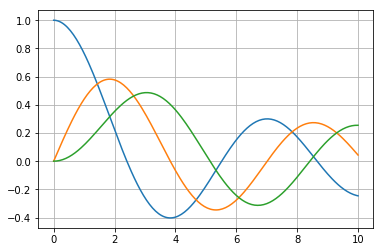

In [14]:
x = np.linspace(0, 10, 201)
for i in range(3):
    plt.plot(x, special.jv(i, x)) 
plt.grid()

Ejercicio

$J_{n-1}(x) + J_{n+1}(x) = \frac{2n}{x}J_n(x)$

In [22]:
n = 1

x = np.linspace(0, 10, 20)
arr1 = (special.jv(n-1, x) + special.jv(n+1, x))*x
arr2 = 2*n*special.jv(n, x)

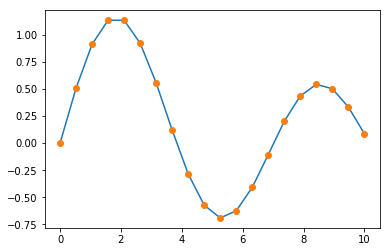

In [23]:
plt.plot(x, arr1)
plt.plot(x, arr2, 'o')

$J_{n-1}(x) - J_{n+1}(x) = 2J'_n(x)$

In [26]:
arr1 = (special.jv(n-1, x) - special.jv(n+1, x))
arr2 = 2*special.jvp(n, x, 1)

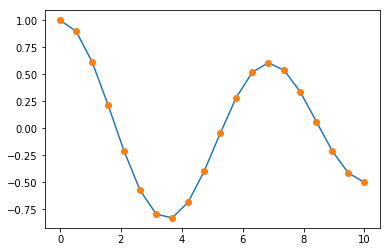

In [27]:
plt.plot(x, arr1)
plt.plot(x, arr2, 'o')

## Gamma

In [30]:
from scipy.special import gamma, factorial

x = np.linspace(-3.5, 5.5, 2251)
y = gamma(x)

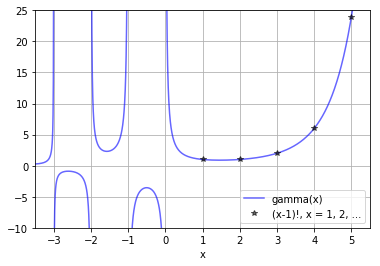

In [31]:
plt.plot(x, y, 'b', alpha=0.6, label='gamma(x)')
k = np.arange(1, 7)
plt.plot(k, factorial(k-1), 'k*', alpha=0.6,
          label='(x-1)!, x = 1, 2, ...')
plt.xlim(-3.5, 5.5)
plt.ylim(-10, 25)
plt.grid()
plt.xlabel('x')
plt.legend(loc='lower right')
plt.show()

## Erf

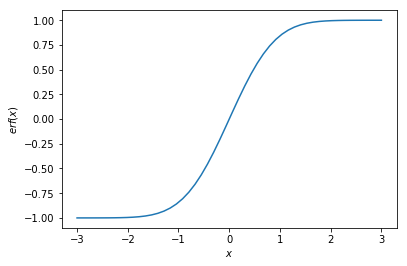

In [32]:
x = np.linspace(-3, 3)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')
plt.show()

## Fresnel

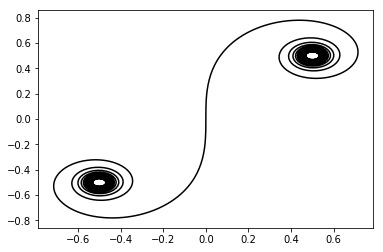

In [33]:
import numpy as np
from scipy.special import fresnel
import pylab
t = np.linspace(-10, 10, 1000)
pylab.plot(*fresnel(t), c='k')
pylab.show()

## Spherical harmonics

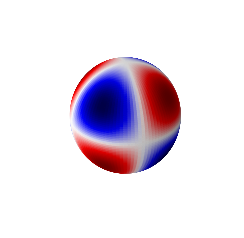

In [76]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm
%matplotlib inline

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()

## Legendre

1/2*(5x^3 + 0x^2 - 3x + 0)

In [38]:
from scipy.special import legendre, hermite
legendre(3)

poly1d([ 2.5,  0. , -1.5,  0. ])

In [39]:
hermite(3)

poly1d([  8.,   0., -12.,   0.])

# Linear algebra operations

https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg

In [43]:
from scipy import linalg

In [44]:
a = np.array([[1., 2.], [3., 4.]])
linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [45]:
np.dot(a, linalg.inv(a))

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

### Solves the linear equation set a * x = b 

In [46]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
x

array([ 2., -2.,  9.])

In [47]:
np.dot(a, x) == b

array([ True,  True,  True])

### Determinant

In [48]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
linalg.det(a)

0.0

In [49]:
a = np.array([[0,2,3], [4,5,6], [7,8,9]])
linalg.det(a)

3.0

### Norm

In [51]:
from scipy.linalg import norm
a = np.arange(9) - 4.0
a

array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [52]:
norm(a)

7.745966692414834

## Eigenvalues

az = lbz

In [55]:
from scipy import linalg
a = np.array([[0., -1.], [1., 0.]])
linalg.eigvals(a)

array([0.+1.j, 0.-1.j])

In [54]:
b = np.array([[0., 1.], [1., 1.]])
linalg.eigvals(a, b)

array([ 1.+0.j, -1.+0.j])

### Euler’s identity (exp(i*theta) = cos(theta) + i*sin(theta)) applied to a matrix:

In [56]:
from scipy.linalg import expm, sinm, cosm

In [57]:
a = np.array([[1.0, 2.0], [-1.0, 3.0]])
expm(1j*a)

array([[ 0.4264593 +1.89217551j, -2.13721484-0.97811252j],
       [ 1.06860742+0.48905626j, -1.71075555+0.91406299j]])

In [58]:
cosm(a) + 1j*sinm(a)

array([[ 0.4264593 +1.89217551j, -2.13721484-0.97811252j],
       [ 1.06860742+0.48905626j, -1.71075555+0.91406299j]])

# Interpolation

https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate

$x_n = \frac{A_nf(B_n) - B_nf(A_n)}{f(B_n) - f(A_n)}$

In [59]:
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)

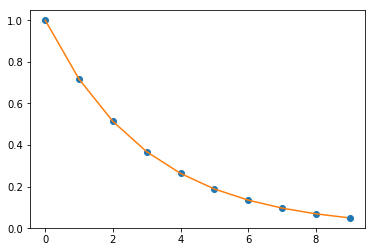

In [60]:
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

### more interpolation

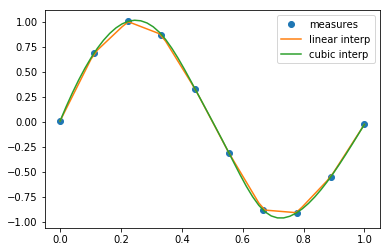

In [115]:
from scipy.interpolate import interp1d

np.random.seed(0)
measured_time = np.linspace(0, 1, 10)
noise = 1e-1 * (np.random.random(10)*2 - 1)
measures = np.sin(2 * np.pi * measured_time) + noise
# Interpolate it to new time points


linear_interp = interp1d(measured_time, measures) 
interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time) 
cubic_interp = interp1d(measured_time, measures, kind='cubic') 
cubic_results = cubic_interp(interpolation_time)

# Plot the data and the interpolation
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures') 
plt.plot(interpolation_time, linear_results, label='linear interp') 
plt.plot(interpolation_time, cubic_results, label='cubic interp') 
plt.legend()
plt.show()

## Cubic

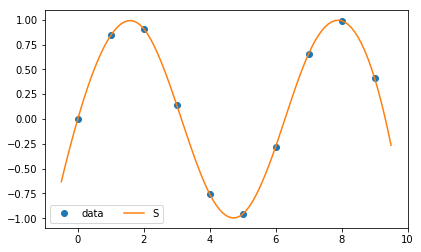

In [9]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
#ax.plot(xs, np.sin(xs), 'x',label='true')
ax.plot(xs, cs(xs), label="S")
#ax.plot(xs, cs(xs, 1), label="S'")
#ax.plot(xs, cs(xs, 2), label="S''")
#ax.plot(xs, cs(xs, 3), label="S'''")
#ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

## 2D interpolation

In [10]:
#want to interpolate the 2-D function
def func(x, y):
     return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [11]:
#on this grid
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [12]:
# but we know only 
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [13]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

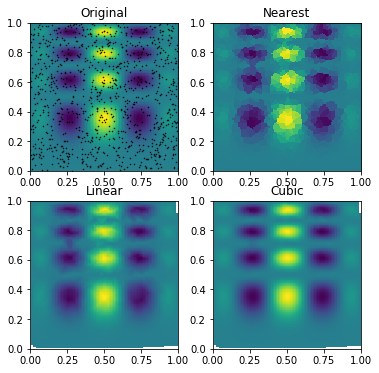

In [18]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

## Interpolate over a 2-D grid.

In [72]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

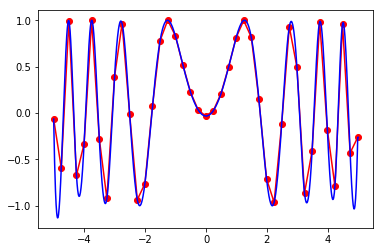

In [73]:
import matplotlib.pyplot as plt
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

## Optimization and Root Finding

https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize

In [4]:
from scipy import optimize

### minimize_scalar

In [104]:
#Minimization of scalar function of one variable.
#Brent: combining the bisection method, the secant method and inverse quadratic interpolation.

def f(x):
    return -np.exp(-(x - 0.7)**2)

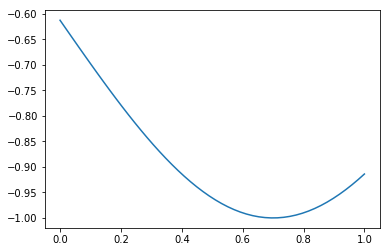

In [5]:
x = np.linspace(0, 1)
plt.plot(x, f(x))

In [6]:
result = optimize.minimize_scalar(f)
result.success # check if solver was successful True

True

In [7]:
x_min = result.x
x_min

0.6999999997839409

### minimize

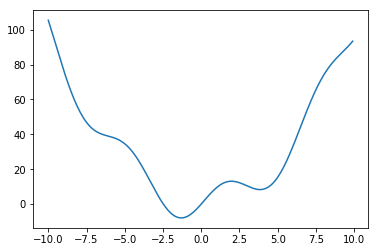

In [106]:
def f(x):
    return x**2 + 10*np.sin(x)
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

In [107]:
optimize.minimize(f, x0=0)

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

### higher dimensional

In [149]:
#find the minimum of scalar functions of one or more variables

def f(x): # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2 

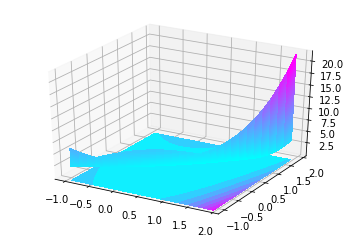

In [150]:
from matplotlib import cm

X = np.arange(-1, 2, 0.1)
Y = np.arange(-1, 2, 0.1)
Z = np.meshgrid(X, Y) 
R = f(Z)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, R, cmap=cm.cool,
        linewidth=0, antialiased=False)
ax.contourf(X, Y, R, zdir='z', offset=-1, cmap=plt.cm.cool)
#ax.set_zlim(-1, 5)

#https://en.wikipedia.org/wiki/Rosenbrock_function

In [58]:
#  conjugate gradient 
#%timeit 
optimize.minimize(f, [-1, 2], method="CG")

     fun: 3.6594553995561456e-13
     jac: array([ 1.80092893e-06, -1.05305185e-06])
 message: 'Optimization terminated successfully.'
    nfev: 112
     nit: 14
    njev: 28
  status: 0
 success: True
       x: array([0.9999996 , 0.99999866])

In [53]:
# Gradient methods need the Jacobian (gradient) of the function.
def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [59]:
#%timeit 
optimize.minimize(f, [-1, 2], method="CG", jac=jacobian)

#only evaluated 28 times, compared with 112

     fun: 6.8224344646208244e-15
     jac: array([ 3.47302111e-07, -1.47011252e-07])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 14
    njev: 28
  status: 0
 success: True
       x: array([1.00000005, 1.00000003])

In [60]:
#http://folk.uio.no/inf3330/scripting/doc/python/SciPy/tutorial/old/node13.html

optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian)

     fun: 1.5601357400786612e-15
     jac: array([ 1.05753092e-07, -7.48325277e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 0
     nit: 10
    njev: 52
  status: 0
 success: True
       x: array([0.99999995, 0.99999988])

In [61]:
def hessian(x): # Computed with sympy
    return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))

In [69]:
optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian, hess=hessian)

     fun: 1.6277298383706738e-15
     jac: array([ 1.11044158e-07, -7.78093352e-08])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 10
     nit: 10
    njev: 20
  status: 0
 success: True
       x: array([0.99999994, 0.99999988])

In [68]:
# Minimize a function over a given range by brute force.
# evaluates the function on a given grid 
optimize.brute(f, ((-1, 2), (-1, 2)))

array([1.00001462, 1.00001547])

### Least square problems, minimizing the norm of a vector function

In [77]:
def f(x):
    return np.arctan(x) - np.arctan(np.linspace(0, 1, len(x)))

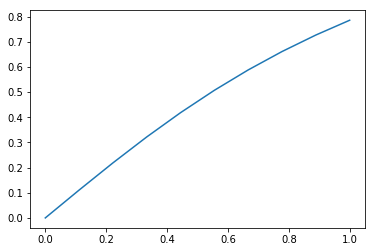

In [91]:
x= np.linspace(0,1,10)
plt.plot(x, np.arctan(x))

In [88]:
a, b = optimize.leastsq(f, x0)

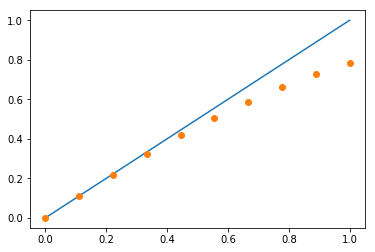

In [93]:
plt.plot(np.linspace(0,1,10), a)
plt.plot(x, np.arctan(x), 'o')

### curve_fit

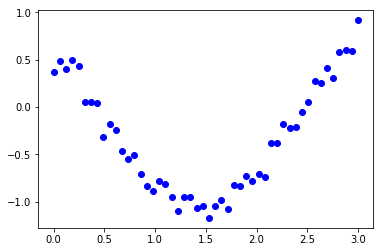

In [96]:
# Use non-linear least squares to fit a function, f, to data.

def f(t, omega, phi):
    return np.cos(omega * t + phi) 

x = np.linspace(0, 3, 50)
y = f(x, 1.5, 1) + .1*np.random.normal(size=50)
plt.plot(x, y, 'bo')

In [101]:
a, b= optimize.curve_fit(f, x, y)

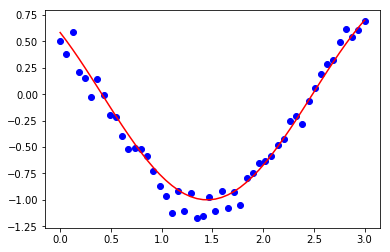

In [103]:
x = np.linspace(0, 3, 50)
y = f(x, 1.5, 1) + .1*np.random.normal(size=50)
plt.plot(x, y, 'bo')
plt.plot(x, f(x, a[0], a[1]), 'r')

### more curve fitting

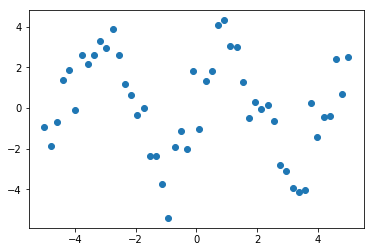

In [108]:
np.random.seed(0)
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

plt.figure(figsize=(6, 4)) 
plt.scatter(x_data, y_data)

In [109]:
def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

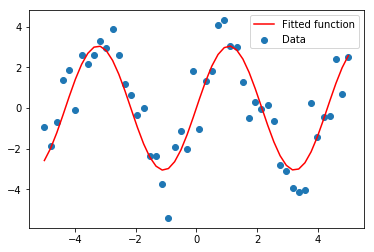

In [111]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]), 'r',
         label='Fitted function')
plt.legend(loc='best')
plt.show()

### Root finding

In [116]:
x = np.arange(-10, 10, 0.1) 
def f(x):
    return x**2 + 10*np.sin(x)

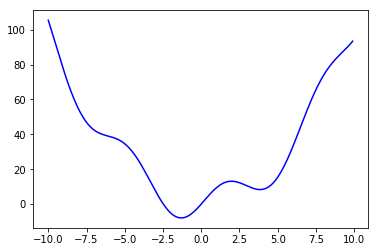

In [117]:
fig = plt.figure(figsize=(6, 4)) 
ax = fig.add_subplot(111)
# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")

### minima

In [118]:
# Global optimization
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid, )) 
print("Global minima found %s" % xmin_global)

# Constrain optimization
xmin_local = optimize.fminbound(f, 0, 10) 
print("Local minimum found %s" % xmin_local)

Global minima found [-1.30641113]
Local minimum found 3.8374671194983834


### root finding

In [122]:
def f(x):
    return (x**3 - 1)  # only one real root at x = 1

def fprime(x):
    return 3*x**2

In [123]:
# brentq, takes as input a bracket
sol = optimize.root_scalar(f, bracket=[0, 3], method='brentq')
sol.root, sol.iterations, sol.function_calls

(1.0, 10, 11)

In [126]:
# newton, takes as input a single point and uses the derivative(s)
sol = optimize.root_scalar(f, x0=0.2, fprime=fprime, method='newton')
sol.root, sol.iterations, sol.function_calls

(1.0, 11, 22)

In [127]:
#The function can provide the value and derivative(s) in a single call.
def f_p_pp(x):
    return (x**3 - 1), 3*x**2, 6*x

In [128]:
sol = optimize.root_scalar(f_p_pp, x0=0.2, fprime=True, method='newton')
sol.root, sol.iterations, sol.function_calls

(1.0, 11, 11)

In [129]:
sol = optimize.root_scalar(f_p_pp, x0=0.2, fprime=True, fprime2=True, method='halley')
sol.root, sol.iterations, sol.function_calls

(1.0, 7, 8)

### complete example

In [119]:
root = optimize.root(f, 1) # our initial guess is 1 
print("First root found %s" % root.x)
root2 = optimize.root(f, -2.5)
print("Second root found %s" % root2.x)

First root found [0.]
Second root found [-2.47948183]


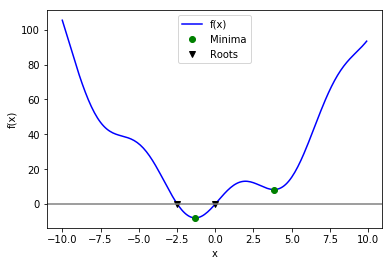

In [120]:
fig = plt.figure(figsize=(6, 4)) 
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, f(x), 'b-', label="f(x)")
# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, f(roots), 'kv', label="Roots")
# Decorate the figure
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.axhline(0, color='gray')
plt.show()

In [130]:
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)
# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

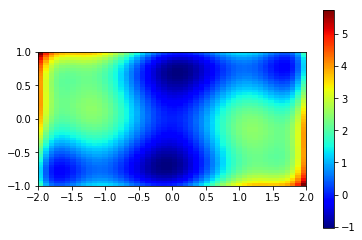

In [135]:
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], cmap=plt.cm.jet) 
plt.colorbar()

Text(0.5,0.92,'Six-hump Camelback function')

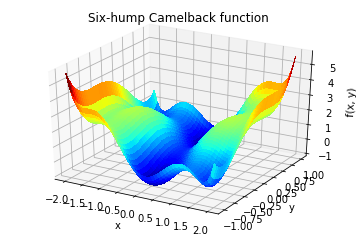

In [136]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

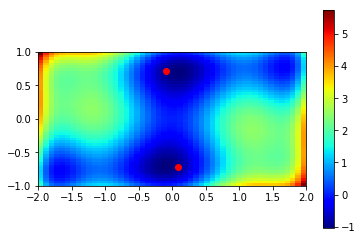

In [148]:
x_min = optimize.minimize(sixhump, x0=[0.5, 0.5])
x_min2 = optimize.minimize(sixhump, x0=[-.5, -0.5])
plt.figure()
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1], cmap=plt.cm.jet) 
plt.colorbar()
# And the minimum that we've found: 
plt.scatter(x_min.x[0], x_min.x[1], c='red')
plt.scatter(x_min2.x[0], x_min2.x[1], c='red')
plt.show()